In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [2]:
# load the dataset
data = pd.read_csv("mall_customers.csv")
X = data[["Annual Income (k$)", "Spending Score (1-100)"]]
print(X)

     Annual Income (k$)  Spending Score (1-100)
0                    15                      39
1                    15                      81
2                    16                       6
3                    16                      77
4                    17                      40
..                  ...                     ...
195                 120                      79
196                 126                      28
197                 126                      74
198                 137                      18
199                 137                      83

[200 rows x 2 columns]


In [3]:
# Scale the data
scaler = StandardScaler()
X = scaler.fit_transform(X)
print(X)
# number of clusters
k = 5

[[-1.73899919 -0.43480148]
 [-1.73899919  1.19570407]
 [-1.70082976 -1.71591298]
 [-1.70082976  1.04041783]
 [-1.66266033 -0.39597992]
 [-1.66266033  1.00159627]
 [-1.62449091 -1.71591298]
 [-1.62449091  1.70038436]
 [-1.58632148 -1.83237767]
 [-1.58632148  0.84631002]
 [-1.58632148 -1.4053405 ]
 [-1.58632148  1.89449216]
 [-1.54815205 -1.36651894]
 [-1.54815205  1.04041783]
 [-1.54815205 -1.44416206]
 [-1.54815205  1.11806095]
 [-1.50998262 -0.59008772]
 [-1.50998262  0.61338066]
 [-1.43364376 -0.82301709]
 [-1.43364376  1.8556706 ]
 [-1.39547433 -0.59008772]
 [-1.39547433  0.88513158]
 [-1.3573049  -1.75473454]
 [-1.3573049   0.88513158]
 [-1.24279661 -1.4053405 ]
 [-1.24279661  1.23452563]
 [-1.24279661 -0.7065524 ]
 [-1.24279661  0.41927286]
 [-1.20462718 -0.74537397]
 [-1.20462718  1.42863343]
 [-1.16645776 -1.7935561 ]
 [-1.16645776  0.88513158]
 [-1.05194947 -1.7935561 ]
 [-1.05194947  1.62274124]
 [-1.05194947 -1.4053405 ]
 [-1.05194947  1.19570407]
 [-1.01378004 -1.28887582]
 

In [4]:
# initialize centroids randomly
centroids = np.random.rand(k, X.shape[1])

# initialize weights as an empty array
weights = np.zeros((X.shape[0], k))

In [5]:
for i in range(20):
    # calculate the distance between each data point and the centroids
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # assign each data point to the closest centroid
    clusters = np.argmin(distances, axis=1)

    # calculate the reciprocal of the distance between each data point and the centroid of the cluster
    for j in range(k):
        weights[clusters == j, j] = 1 / distances[clusters == j, j]

    # calculate the weighted average of the data points in each cluster to update the centroids
    for j in range(k):
        if np.sum(weights[clusters == j, j]) != 0:
            centroids[j] = np.average(X[clusters == j], axis=0, weights=weights[clusters == j, j])

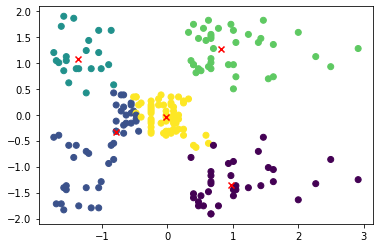

In [6]:
# Plot the results
plt.scatter(X[:,0], X[:,1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x')
plt.show()

In [7]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X, clusters)
print("Silhouette Score:", score)

Silhouette Score: 0.4487438839180797


In [1]:
print(weights)

NameError: name 'weights' is not defined